# Sistemas Lineares

In [1]:
import numpy as np
from scipy.linalg import solve_triangular
import time
import random

# Métodos diretos 


## Decomposição LU

Dado um sistema $Ax = b$, podemos decompor $A$ em um  matriz triangular inferior $L$ com todos os elementos da diagonal igual a 1 e em uma matriz triangular superior $U$. O objetivo dessa decomposição é simplificar e otimizar o processo de resolução de sistemas lineares, pois existem algoritmos rápidos para resolver sistema triangulares.

$A = LU$

$\left[\begin{array}{c c c c c}
{a_{11}}&  a_{12}&  a_{13}& \cdots& a_{1n}\\ 
a_{21}&  a_{22}&  a_{23}& \cdots& a_{2n}\\
a_{31}&  a_{32}&  a_{33}& \cdots& a_{3n}\\
\vdots& & & & \vdots&\\
a_{n1}&  a_{n2}&  a_{n3}& \cdots& a_{nn}\end{array}\right] =  \left[\begin{array}{c c c c c}
{1}&  &  &  & \\ 
l_{21}&  1& & & \\
l_{31}&  l_{32}&  1& &\\
\vdots& & & \ddots& \\
l_{n1}&  l_{n2}&  l_{n3}& \cdots& 1\end{array}\right] \cdot \left[\begin{array}{c c c c c}{u_{11}}&  u_{12}&  u_{13}& \cdots& u_{1n}\\ 
&  u_{22}&  u_{23}& \cdots& u_{2n}\\
&  &  u_{33}& \cdots& u_{3n}\\
& & & \ddots & \vdots&\\
&  &  & & u_{nn}\end{array}\right]$ 

**Como resolver o sistema:**

$Ax = b \Leftrightarrow LUx = b$

Primeiro chamamos $Ux$ de $y$ ficando com $L\underset{y}{\underbrace{Ux}}= b$, então resolvemos esse o sistema triangular inferior $Ly=b$.

Depois de encontrar o $y$ e resolvemos o sistema triangular superior $Ux = y$, assim encontramos o resultado do sistema $Ax=b$ de forma mais simples.

**Cálculo da $L$ e $U$**

Calcular a primeira linha de $U$ é trivial, pois ao multiplicar a primeira linha de $L = [1,0,0...]$ pela primeira coluna de $U = [u_{11},0,0...]^T$ o resultado é $u_{11}$, generalizando , para $a_{1j} = u_{1j}\cdot 1 + u_{2j}\cdot0+...$, assim podemos afirmar que $u_{1j} = a_{1j}$

A primeira coluna de $L$ também é simples, ao calcular $a_{i1}$ obtemos que $a_{i1} = l_{i1} \cdot u_{11} + l_{i2} \cdot0 +l_{i3} \cdot0+...$, para $i = 2,3,..$, ou seja, $l_{i1} = a_{i1}/u_{11}$

Continuando o processo conseguimos obter um **termo geral** para $L$ e $U$, então para conseguir qualquer valor de $U$ e $L$ só utilizar as fórmulas abaixo:

- $u_{ij} = a_{ij} - \sum _{k=1}^{i-1}l_{ik}u_{kj}$


- $l_{ij} = \frac{a_{ij} - \sum _{k=1}^{j-1}l_{ik}u_{kj}}{u_{jj}}$

**Obs:** Primeiro calcula uma linha de $U$ depois uma coluna de $L$, pois eles são dependentes.

### Mais informações sobre LU
 
#### Menores Principais

- Se $A$ possui todos os menores principais não-singulares, isto é, $det(A_{k})\neq 0, k=1,…,n-1$ podemos garantir que existem uma única $L$ e uma única $U$, tal que $A = LU$ onde $A_{1} = a_{11}, A_{2} = \begin{bmatrix} 
 a_{11}& a_{12} \\ 
 a_{21}& a_{12} 
\end{bmatrix},...$

- Se $A$ possui o último menor principal $\neq0$, isto é, $det(A_{n})\neq 0$ podemos garantir que o sistema linear tem apenas uma solução


#### Propriedades

Uma outra aplicação de $LU$ é para cálculo de determinante.

Sendo $A=LU$, aplicamos deteterminante dos dois lados $det(A) = det(LU)\Rightarrow det(A) = det(L)det(U)$, como determinante de uma matriz triangular é a multiplicação dos elementos da diagonal da matriz ficamos com $det(A) = \underset{1}{\underbrace{det(L)}}det(U$).

Assim, para calcular o determinante de $A$ é só multiplicar os elementos da diagonal da matriz $U$.






In [146]:
def solve_upper(U, y):
    
    """ Resolve um sistema triangular superior Ax=b
    
    Args:
        A: Matriz triangular superior
        b: Vetor 
    Retorno:
        vetor solução x
    """
    n = np.shape(y)[0]
    x = np.zeros(n)

    for i in np.arange(n-1,-1,-1): # limite superior:último índice (menor) -1:-1 (step é decremento) --> 4:2:-1 percorre 4 e 3.
        x[i] = (y[i]-U[i,i+1:n].dot(x[i+1:n]))/U[i,i]

    return x
    


def solve_lower(L, b):
    
    """ Resolve um sistema triangular inferior Ax=b
    
    Args:
        A: Matriz triangular inferior
        b: Vetor 
    Retorno:
        vetor solução x
    """
    
    n = np.shape(b)[0]
    z = np.zeros(n)

    for i in np.arange(n):
        z[i] = (b[i]-L[i,0:i].dot(z[0:i]))/L[i,i] #z[np.arange(i)] --> percorre até i-1

    return z
        
 

In [147]:
def lu_decomp(A):
    
    """ Decompões uma matriz A em uma matriz triangular inferior L e uma superior U
    
    Args:
        A: Matriz
    Retorno:
        L,U
    """
    
    n = np.shape(A)[0]
    
    #cria uma matriz identidade de tamanho n
    L = np.eye(n)
    
    #cria uma matriz zerada de tamanho n
    U = np.zeros((n,n))
    
    for k  in np.arange(n):
        
        #calcula linha de U
        for j in np.arange(k,n):
            U[k,j]=A[k,j]-np.dot(L[k,:k],U[:k,j])
            
        #calcula coluna de L
        for i in np.arange(k+1,n):
            L[i,k]=A[i,k]-np.dot(L[i,:k],U[:k,k])
            L[i,k]=L[i,k]/U[k,k]
    
    return L, U
              

def solve_lu_decomp(A,b):
    
    """ Resolve um sistema linear Ax=b utilizando decomposição LU
    
    Args:
        A: Matriz
        b: Vetor 
    Retorno:
        vetor solução x 

    
    """
    
    L,U = lu_decomp(A) 
    # Resolve o sistema triangular Ly = b
    y = solve_lower(L, b)
    # Resolve o sistema triangular Ux = y
    x = solve_upper(U, y)
   
   
    return x
                      

In [148]:
A = np.array([[-1,2,-2,1], [-2,2,-3,0], [-2,0,-1,-3], [-2,0,0,-2]])
b = np.array([1,1,1,1])

L, U = lu_decomp(A)

if((L@U == A).all()):
    print("A decomposição ocorreu corretamente\n")
    
x = solve_lu_decomp(A,b)

print(x,np.linalg.solve(A,b))

if((x ==np.linalg.solve(A,b)).all()):
    print("\nA resposta calculada é igual a do python")


A decomposição ocorreu corretamente

[-0.    1.25  0.5  -0.5 ] [-0.    1.25  0.5  -0.5 ]

A resposta calculada é igual a do python


## Decomposição de Cholesky

A decomposição de Cholesky é uma forma de decompor $A$ que também facilita a resolução de sistema lineares, mas ela so funciona se a mtriz for simétrica positiva definida.

### Matiz Simétrica Positiva Definida (SPD)

Uma matriz simétrica $A \in \mathcal{M}_{n,n} (A = A^{t})$ é dita simétrica positiva
definida (SPD), se $x^{t} \cdot Ax > 0$, para todo vetor não-nulo $v\in \mathbb{R}^{n}$.

Para testar se a matriz simétrica $A$ é SPD podemos checar os testes abaixo, se um deles estiver sendo garantido então podemos afirmar que é SPD:

1) $det(A_{k})>0,k=1,2,...,n$; \
2) todos os autovalores de $A$ são positivos 

**Prova**

Para provar isso podemos pegar por exemplo uma matriz diagonal e fazer a operação $x^{t} \cdot Dx$, o resultado será $a_{11}x_{1}^{2} + a_{22}x_{2}^{2} + a_{33}x_{3}^{2}+...+a_{nn}x_{n}^{2}$

Então se eu tenho um $a_{i}<0$ e um vetor $x$ que todos os elementos são 0, exceto a o $x_{i}$ que é 1, ao fazer o somatório ficamos com $\sum_{i=1}^{n}{a_{i}x_{i}^{2}} =  a_{i} < 0$.<br>

Para ser SVD sabemos que $x^{T} \cdot Ax$ tem que ser maior que $0$, então para que isso aconteça todos os $a_{i}$ precisam ser maiores que 0, porque se um não for vai existir um $x_{i}$ que não torna isso verdade como mostrado no exemplo acima. 

Então concluimos que se $A$ é diagonal e SPD $\Rightarrow a_{i}>0$

Agora pensando em uma matriz genérica $A$, primeiro diagonalizamos ela ficando com $P^{-1}DP$, escolhendo uma $P$ ortogonal podemos escrever como $P^{T}DP$, substituindo na equação $x^{T}Ax$ ficamos com  $x^{T}Ax = \underset{(Px)^{T}}{\underbrace{x^{T}P^{T}}}DPx$, chamando $Px$ de $y$ ficamos com $y^{T}Dy$.

Então podemos afirmar que $x^{T}Ax >0 \Leftrightarrow y^{T}Dy >0$, e sabemos que para a expressão $y^{T}Dy$ ser maior que 0 somente se os $d_{i}>0$. Como diagonalizamos a $A$ sabemos que os $d_{i}$ são os autovalores de $A$, então para que a matriz $A$ seja $SPD$ é necessário que todos os autovalores da mesma sejam positivos, como queríamos demonstrar.

Como o determinante é o produto dos autovalores e os autovalores precisam ser maiores que 0 para ser SPD, então o determinante também precisa ser maior que 0 para ser SPD.

### Método

Sendo SPD podemos utilizar a decomposição de Cholesky, que é mais eficiente que a decomposição $LU$ e consome menos memória. Vamos decompor a matriz $A$ em $A = H \cdot H^{T}$, sendo $H$ uma matriz triangular inferior com os elementos da diagonal $>0$

$H = \left[\begin{array}{c c c c c}
{h_{11}}& &  & & \\ 
h_{21}&  h_{22}& & & \\
h_{31}&  h_{32}&  h_{33}& & \\
\vdots& \vdots& \vdots& \ddots& &\\
h_{n1}&  h_{n2}&  h_{n3}& \cdots& h_{nn}\end{array}\right]$


**Cáculo da H**

Podemos definir em dois cenário, para diagonal e para fora da diagonal.

1) Para diagonal 

- Sabemos que  ao multiplicar as matrizes ficamos com a expressão $a_{ii} = \sum_{k=1}^i h_{ik}(h_{ki})^T$, como $(h_{ki})^T = h_{ik}$ ficamos com $a_{ii} = \sum_{k=1}^i h_{ik}^2$, tirando do somatório quando $k=i$ temos a equação $a_{ii} = \sum_{k=1}^{i-1} h_{ik}^2 + h_{ii}^2$ 

- Isolando $h_{ii}$ ficamos com o termo geral abaixo:

$\left\{\begin{matrix}
h_{11} = \sqrt{a_{11}},\\
h_{ii} = (a_{ii} - \sum_{k=1}^{j-1}{h_{ik}^{2}})^{1/2} 
\end{matrix}\right.$<br><br>

2) Fora da diagonal

- Sabemos que  ao multiplicar as matrizes ficamos com a expressão $a_{ij} = \sum_{k=1}^j h_{ik}h_{jk}$, tirando quando o $k=j$ do somatório ficamos com $a_{ij} = \sum_{k=1}^{j-1} h_{ik}{hjk}+ h_{ij}h_{jj}$

- Isolando $h_{ij}$ ficamos com o termo geral abaixo:

$\left\{\begin{matrix}h_{i1} = \frac{a_{i1}}{h_{11}}, i = 2,3,...,n , \\
h_{ij} = \frac{(a_{ij}- \sum_{k=1}^{j-1}{h_{ik}h_{jk}})}{h_{jj}}, 2 \leq j < i \end{matrix}\right.$
<br><br>
**Como resolver o sistema:**

Para resolver o sistema é da mesma forma que é feita com $LU$, mas agora com a decomposição $A = H\cdot H^{T}$

Primeiro chamamos $H^{T}x$ de $y$ ficando com $H\underset{y}{\underbrace{H^{T}x}}= b$, então resolvemos esse o sistema triangular inferior $Hy=b$.

Depois de encontrar o $y$ e resolvemos o sistema triangular superior $H^{T}x = y$, assim encontramos o resultado do sistema $Ax=b$ de forma mais simples.


In [149]:
def cholesky(A):
    
    """ Decompõe uma matriz A em uma matriz triangular inferior H e uma H transposta
    
    Args:
        A: Matriz
    Retorno:
        H: Matriz triangular 
    """
    n = len(A)
    
    H = np.zeros((n, n))
    
    H[0, 0] = np.sqrt(A[0, 0])
    
    for i in range(1, n):
        for j in range(0, i+1):
            sum_ = 0
            sum_+= np.dot(H[i,:j],H[j,:j])
           
                
            # calcula elemento da diagonal
            if i == j:           
                H[i, i] = np.sqrt(A[i, i] - sum_)
            # calcula elemento fora da diagonal
            else:
                H[i, j] = (A[i, j] - sum_)/H[j, j]
    
    return H


def solve_cholesky(A, b):

    """ Resolve um sistema linear Ax=b utilizando decomposição de cholesky
    
    Args:
        A: Matriz
        b: Vetor 
    Retorno:
        vetor solução x
    """
    
    H = cholesky(A)
    
    # Resolve o sistema triangular Hy = b
    y = solve_lower(H, b)
    # Resolve o sistema triangular Htx = y
    x = solve_upper(H.transpose(), y)
    
    return x

In [153]:
def gram_schmidt(vectors):
    """Aplica o processo de ortogonalização de Gram-Schmidt 
    a um conjunto S de vetores
    
    Args:
        vectors: conjunto S de vetores
    Retorno:
        conjunto ortonormal de vetores
    """
    basis = []
    
    for v in vectors:
        w = v - sum(np.dot(v,b)*b for b in basis)
        
        if (w > 1e-10).any():  
            basis.append(w/np.linalg.norm(w))
    
    return np.array(basis)

def generate_sim_matrix(n):
    """ Gera uma matriz simétrica nxn
    
    Args:
        n: dimensão da matriz
    Retorno:
        matriz simétrica
    """
    A = np.random.rand(n,n)
    return A@A.T

def generate_spd_matrix(n):
    
    """ Gera uma matriz simétrica positiva definida e diagonal dominante
    
    Args:
        n: dimensão da matriz
    Retorno:
        matriz spd diagonal dominante
    """

    Q = np.random.rand(n,n)
    D = random.sample(range(1, n+1), n)
    D = np.diag(D)

    for i in range(n):
        Q[i, i] = sum(np.abs(Q[:, 1])) + 5

    Q = gram_schmidt(Q.T)

    return Q.T @ D @ Q

In [158]:
n = 4
A = generate_spd_matrix(n)
b = random.sample(range(1, n+1), n)

H = cholesky(A)


if((H@H.transpose() - A).all()<1e-10):
    print("A decomposição ocorreu corretamente\n")
    
x = solve_cholesky(A,b)

print(np.round(x,8),np.linalg.solve(A,b))

if(np.allclose(x,np.linalg.solve(A,b))):
    print("\nA resposta calculada é muito próxima do python")

A decomposição ocorreu corretamente

[2.65532705 1.01000419 1.57934377 0.62477517] [2.65532705 1.01000419 1.57934377 0.62477517]

A resposta calculada é muito próxima do python


## Eliminação Gaussiana

A eliminação de gauss tem o objetivo de transformar um sistema linear complicado em um equivalente fácil de resolver por exemplo um triangular, preservando o determinante.

###  Relembrando conceitos

#### Sistemas Lineares equivalentes
- Dois sistemas são ditos equivalentes se possuem a mesma solução
- Se um sistema linear é obtido partir de outro sistema através de uma sequência finita de operações elementares, eles são equivalentes

#### Operações Elementares
  
  Denotando $L_{i}$ a $i$-ésima linha de um sistema linear, temos 3 operações elementares:
  
  1. Trocar duas linhas no sistema: $L_{i}\leftrightarrow L_{j}$
  2. Multiplicar uma linha por um escalar $\lambda \neq 0: L_{i}\leftarrow \lambda L_{i}$
  3. Somar a uma linha um múltiplo de uma outra linha: $L_{i}\leftarrow L_{i}+\lambda L_{j}$
     
  Dessas três operações apenas a $3^{o}$ preserva o determinante:
     
     **Prova**:
     Dada as matrizes $A$ e $\bar{A}$\
     \
     $A = \begin{bmatrix}... \\l_{j}\\ ...\\l_{i}\\...\end{bmatrix} \bar{A} =\begin{bmatrix}... \\l_{j}\\ ...\\l_{j}+\lambda l_{j}\\...\end{bmatrix}$
     
     $det(\bar{A}) = det\left (\begin{bmatrix}... \\l_{j}\\ ...\\l_{j}+\lambda l_{j}\\...\end{bmatrix}\right )
 =  det\left (\begin{bmatrix}... \\l_{j}\\ ...\\l_{i}\\...\end{bmatrix}\right )+ \lambda det\left (\begin{bmatrix}... \\l_{j}\\ ...\\l_{j}\\...\end{bmatrix}\right) = det\left (\begin{bmatrix}... \\l_{j}\\ ...\\l_{i}\\...\end{bmatrix}\right ) + \lambda 0 = det(A) $
 


###  Método

Para resolver o sistema de $Ax = b$, usamos a matriz aumentada $[A|b]$ e aplicamos os seguintes passos:

Dada a matriz aumentada $$[A|b] =\left[\begin{array}{c c c c c|c}\color{red}{a_{11}}&  a_{12}&  a_{13}& ...& a_{1n}& b_{1}\\ a_{21}&  a_{22}&  a_{23}& ...& a_{2n}& b_{2}\\ a_{31}&  a_{32}&  a_{33}& ...& a_{3n}& b_{3}\\ \vdots& & & & \vdots& \vdots\\ a_{n1}&  a_{n2}&  a_{n3}& ...& a_{nn}& b_{n}\end{array}\right]$$

1) Escolhe um pivô arbitrário, nesse caso $a_{11}$\
2) Zerar todos os valores abaixo do pivô

Para isso vamos usar a $3^{o}$ operação $L_{2}\leftarrow L_{2}+ m_{21} L_{1}$, para zerar o primeiro elemento de $L_{2}$, que é nosso objetivo,precisamos encontrar um $m_{21}$ que multiplicado por $a_{11}$ e somado a $a_{21}$ dê zero, ou seja, $a_{11}\cdot m_{21} +a_{21} = 0$, isolando o $m$ obtemos que $m_{21} = -a_{21}/a_{11}$<br>
Lembrando que tem que alterar todos os valores da linha que está sendo modificada incluindo os elementos de b

Ao fazer esse mesmo procedimento para todas as outras linhas $L_{i}\leftarrow L_{i}+ m_{i1} L_{1}$, onde $i=(2,3,...,n)$ com $m_{i1} = -a_{i1}/a_{11}$, zeramos todos os elementos abaixo do pivô.

3) Escolhe um novo pivô e faz o mesmo procedimento agora visando zerar os elementos da  $2^{a}$ coluna<br><br>

$$[A|b] = \left[\begin{array}{c c c c c|c}{a_{11}}& a_{12}&  a_{13}& ...& a_{1n}& b_{1}\\ 0&  \color{red}{a_{22}}&  a_{23}& ...& a_{2n}& b_{2}\\ 0&  a_{32}&  a_{33}& ...& a_{3n}& b_{3}\\ \vdots& & & & \vdots& \vdots\\ 0&  a_{n2}&  a_{n3}& ...& a_{nn}& b_{n}\end{array}\right]$$<br><br>


Fazendo $L_{i}\leftarrow L_{i}+ m_{i2} L_{2}$, onde $i=(3,4,...,n)$ com $m_{i2} = -a_{i2}/a_{22}$, zeramos os elementos da $2^{a}$ coluna

4) Vamos fazer esse procedimento até $L_{i}\leftarrow L_{i}+ m_{i,n-1} L_{n-1}$, onde $i=(3,4,...,n)$ com $m_{i,n-1} = -a_{i,n-1}/a_{n-1,n-1}$
<br><br>
$$[A|b] =\left[\begin{array}{c c c c c|c}{a_{11}}& a_{12}&  a_{13}& ...& a_{1n}& b_{1}\\ 0& {a_{22}}&  a_{23}& ...& a_{2n}& b_{2}\\ 0&  0&  a_{33}& ...& a_{3n}& b_{3}\\ \vdots& & & & \vdots& \vdots\\ 0&  0&  0& ...& a_{nn}& b_{n}\end{array}\right]$$
<br><br>
5) O resultado final é um sistema triangular e é só fazer as substituições e encontrar os resultados desse sistema

### Eliminação de Gauss e LU

#### Foma Matricial

Podemos representar as operações usadas no método de gauss de forma matricial para resolver uma equação $Ax = b$

#### Passo a passo:

1) Anular todos os elementos abaixo do pivô, multiplicando os dois lados da expressão $Ax = b$ por nossa $M_{1}$, matriz que contem os $m$ utilizados para zerar os elementos da primeira coluna, tendo agora uma $A_{1}$ que tem todos os elementos abaixo do pivô iguais a 0<br><br> 

$M_{1} A x = M_{1} b \Leftrightarrow \left[\begin{array}{c c c c c}1&  &  & & \\ m_{21}&  1&  & & \\ m_{31}&  &  1& &\\ \vdots& & & \ddots& \\ m_{n1}&  &  & & 1\end{array}\right]\cdot\left[\begin{array}{c c c c c}\color{red}{a_{11}}&  a_{12}&  a_{13}& ...& a_{1n}\\ a_{21}&  a_{22}&  a_{23}& ...& a_{2n}\\ a_{31}&  a_{32}&  a_{33}& ...& a_{3n}\\ \vdots& & & & \vdots\\ a_{n1}&  a_{n2}&  a_{n3}& ...& a_{nn}\end{array}\right]\cdot x = M_{1}b\Leftrightarrow \left[\begin{array}{c c c c c}{a_{11}}& a_{12}&  a_{13}& ...& a_{1n}\\ 0&  \color{red}{a_{22}}&  a_{23}& ...& a_{2n}\\ 0&  a_{32}&  a_{33}& ...& a_{3n}\\ \vdots& & & & \vdots\\ 0&  a_{n2}&  a_{n3}& ...& a_{nn}\end{array}\right]\cdot x = M_{1}b$ 
<br><br>
2) Anular todos os elementos abaixo do pivô, agora temos a expressão $A_{1}x = M_{1}b$, ao multiplicar $M_{2}$ por toda da expressão geramos uma $A_{2}$ com os elementos zerados <br><br>

$M_{2}A_{1}x = M_{2}M_{1} b \Leftrightarrow \left[\begin{array}{c c c c c}1&  &  & & \\ &  1&  & & \\ &  m_{32}&  1& &\\ & \vdots& & \ddots& \\ &  m_{n2}&  & & 1\end{array}\right]\cdot\left[\begin{array}{c c c c c}{a_{11}}& a_{12}&  a_{13}& ...& a_{1n}\\ 0&  \color{red}{a_{22}}&  a_{23}& ...& a_{2n}\\ 0&  a_{32}&  a_{33}& ...& a_{3n}\\ \vdots& & & & \vdots\\ 0&  a_{n2}&  a_{n3}& ...& a_{nn}\end{array}\right]\cdot x = M_{2}M_{1}b\Leftrightarrow \left[\begin{array}{c c c c c}{a_{11}}& a_{12}&  a_{13}& ...& a_{1n}\\ 0& {a_{22}}&  a_{23}& ...& a_{2n}\\ 0&  0&  a_{33}& ...& a_{3n}\\ \vdots& & & & \vdots \\ 0&  0&  a_{n3}& ...& a_{nn}\end{array}\right]\cdot x = M_{2}M_{1}b$
<br><br>
3) Faz o mesmo procedimento para todas as colunas até chegar no pivo $a_{n-1,n-1}$ gerando nossa matriz triangular inferior que utilizamos para resolver o sistema de forma simples<br><br>

$M_{n-1}A_{n-1}x = M_{n-1}...M_{1} b \Leftrightarrow \left[\begin{array}{c c c c c}1&  &  & & \\ &  1&  & & \\ &  &  1& &\\ & & & \ddots& \\ &  &  & m_{n,n-1}& 1\end{array}\right]\cdot\left[\begin{array}{c c c c c}{a_{11}}&  a_{12}&  a_{13}& ...& a_{1,n-1}& a_{1n}\\ 0&  a_{22}&  a_{23}& ...& a_{2,n-1}& a_{2n}\\ 0&  0&  a_{33}& ...& a_{3,n-1}& a_{3n}\\ \vdots& & & & \vdots\\ 0&  0&  0& ...& a_{n,n-1}& a_{nn}\end{array}\right]\cdot x = M_{n-1}...M_{1}b\Leftrightarrow \left[\begin{array}{c c c c c}{a_{11}}&  a_{12}&  a_{13}& ...& a_{1,n-1}& a_{1n}\\ 0&  a_{22}&  a_{23}& ...& a_{2,n-1}& a_{2n}\\ 0&  0&  a_{33}& ...& a_{3,n-1}& a_{3n}\\ \vdots& & & & \vdots\\ 0&  0&  0& ...& 0& a_{nn}\end{array}\right]\cdot x = M_{n-1}...M_{1}b$<br><br>

**Gauss para $LU$**<br><br>
Ao finalizar o processo percebemos que conseguimos fazer a fatoração $LU$ justamente utilizando a eliminação de gauss, nossa $U$ neste caso é justamente a nossa matriz triangular final 

$$U = \left[\begin{array}{c c c c c}{a_{11}}&  a_{12}&  a_{13}& ...& a_{1,n-1}& a_{1n}\\ 0&  a_{22}&  a_{23}& ...& a_{2,n-1}& a_{2n}\\ 0&  0&  a_{33}& ...& a_{3,n-1}& a_{3n}\\ \vdots& & & & \vdots\\ 0&  0&  0& ...& 0& a_{nn}\end{array}\right]$$<br>

Para achar a $L$ é um pouco mais indireto mas sabemos que $A_{n-1}x = M_{n-1}...M_{1}b$ e que $A_{n-1} = U$, então podemos afirmar que $Ux = M_{n-1}...M_{1}b$ como $LUx = b$ podemos dizer que $L = (M_{n-1}...M_{1})^{-1} \Leftrightarrow L = M^{-1}_{1}M^{-1}_{2}...M^{-1}_{n-1}$, ou seja: <br>

$$L = \left[\begin{array}{c c c c c}1&  &  & & \\ -m_{21}&  1&  & & \\ -m_{31}& -m_{32}&  1& &\\ \vdots& \vdots& \vdots& \ddots& \\ -m_{n,1}& -m_{n,2} & -m_{n,3} & -m_{n,n-1}& 1\end{array}\right]$$

In [162]:
def gaussian_elimination(A, b):
    
    """ Faz o processo de eliminação de gauss transfomando Ax=b em um sistema linear triangular
    
    Args:
        A: Matriz
        b: Vetor
    Retorno:
        A: Nova matriz A triangular
        b: Novo vetor b
        M: matriz com todos o m
    """
    
    A = A.copy()
    b = b.copy()
    
    n = len(A)
    
    # M é matriz identidade inicialmente
    M = np.eye(n)
    
    for i in range(n):
        # escolhe o povo
        pivot = A[i, i]
        
        if(pivot==0):
            print('O sistema precisa ser resolvido com pivoteamento parcial')
            
        for k in range(i+1, n):
            
            #calcula o m que zera o elemento desejado
            m = A[k, i]/pivot

            A[k] = A[k] - A[i]*m
            b[k] = b[k] - b[i]*m
            M[k,i] = m 
    
    return A, b, M

In [163]:
def solve_gauss(A, b):
    
    """ Resolve um sistema linear Ax = b utilizando eliminação de gauss
    
    Args:
        A: Matriz
        b: Vetor
    Retorno:
        x: vetor solução
    """
    A, b, M = gaussian_elimination(A, b)

    # calcula o sistema triangular superior
    return solve_upper(A,b)

In [164]:
def solve_lu_gauss(A, b):
    
    """ Resolve um sistema linear Ax = b utilizando eliminação de gauss junto com LU
    
    Args:
        A: Matriz
        b: Vetor
    Retorno:
        x: vetor solução
    """
    
    bo = b.copy()
    
    U,b,L = gaussian_elimination(A,b)
    
    y = solve_lower(L,bo)
    x = solve_upper(U,y)
    
    return x

In [165]:
# Todos os métodos vistos até agora dão aproximadamente o mesmo valor
n = 4
A = generate_spd_matrix(n)
b = random.sample(range(1, n+1), n)
print(f'Python:{np.linalg.solve(A,b)}\n')
print(f'LU:{np.round(solve_lu_decomp(A,b),8)}\n')
print(f'Eliminação de Gauss:{np.round(solve_gauss(A,b),8)}\n')
print(f'Gauss + LU:{np.round(solve_lu_gauss(A,b),8)}\n')
print(f'Cholesky: {np.round(solve_cholesky(A,b),8)}\n')


Python:[2.02890068 0.09818632 1.89991508 1.07266049]

LU:[2.02890068 0.09818632 1.89991508 1.07266049]

Eliminação de Gauss:[2.02890068 0.09818632 1.89991508 1.07266049]

Gauss + LU:[2.02890068 0.09818632 1.89991508 1.07266049]

Cholesky: [2.02890068 0.09818632 1.89991508 1.07266049]



### Pivô igual ou próximo de 0

Quando o pivô é 0 não podemos utilizar o método de gauss para calcular os $m_{ij}$, pois para os encontrar nós fazemos uma divisão pelo pivô e ai teíamos uma divisão por 0.

No caso de ser próximo ao 0 também ocorrem problemas de aproximação e o resultado pode ficar errado.

Por isso o método da eliminação de gauss precisa ser adaptado, para que ele funcione fazemos um procedimento chamado pivoteamento parcial.

#### Pivoteamento parcial

Vamos utilizar o pivoteamento de linha, ou parcial. Existe um pivoteamento total que leva em conta linhas e colunas mas é muito custoso computacionalmente.

**Método**<br>
Para cada passo $k$ ao invés de escolher um pivô arbitrário, escolhe para ser o pivô o maior elemento da coluna em módulo. Ao encontrar permuta a linha que contêm esse maior elemento com a linha $k$, depois só fazer o método de eliminação de gauss demonstrado anteriormente.

Para permutar as linhas pela forma matricial é so fazer $P\cdot A$. O $P$ será justamente a matriz identidade com as linhas referentes permutadas. Por exemplo, se quero permutar na minha matriz $A$ a linha $i$ com a linha $j$ só pegar a matriz identidade permutar a linha $i$ com a linha $j$ e multiplicar pela $A$.

#### Decomposição LU

Caso um dos menores pricipais seja singular, não podemos fazer a decomposição $LU$ da forma normal, então fazemos da seguinte forma: 

$$P \cdot A = L \cdot U$$ onde P é a matriz de permutações.

**Como resolver o sistema:**
Sabemos que $Ax = B \Leftrightarrow (LU)x = (PA)x = Pb$

1) Resolver $Ly = Pb$ encontrando o valor de $y$\
2) Resolver $Ux = y$ 

Para achar $U$ pode ser feita da mesma forma sem o pivoteamento então $U$ é justamente a matriz triangular resultante da eliminação de gauss

Para $L$ é um pouco diferente, vale lembrar que a $U$ sem o pivoteamento parcial $U = M_{n-1}...M_{2}M_{1}A$, já com o pivoteamento multiplicamos cada etapa pela permutação necessária então fica  $U = M_{n-1}P_{n-1}...M_{2}P_{2}M_{1}P_{1}A$.

Isolando $A$ podemos deixar a expressão da forma $A = (M_{n-1}P_{n-1}...M_{2}P_{2}M_{1}P_{1})^{-1}U$, ao multiplicar $P$, sendo $P$ a composição de todas as permutações que foram feitas, dos dois lados chegamos na forma $AP = P(M_{n-1}P_{n-1}...M_{2}P_{2}M_{1}P_{1})^{-1}U$. Já que $PA = LU$, podemos afirmar que $L = P(M_{n-1}P_{n-1}...M_{2}P_{2}M_{1}P_{1})^{-1}$



In [166]:
def gauss_pivot(A,b):
    
    """ Faz o processo de eliminação de gauss transfomando Ax=b em um sistema linear triangular
        utilizando o método de pivoteamento parcial
    
    Args:
        A: Matriz
        b: Vetor
    Retorno:
        A: Nova matriz A triangular
        b: Novo vetor b

    """
    
    n = np.shape(A)[0]
    A = A.copy()
    b = b.copy()

    for k in range(n-1):
        
        maxindex = abs(A[k:,k]).argmax() + k
   
        #Swap rows
        if maxindex != k:
            A[[k,maxindex]] = A[[maxindex, k]]
            b[[k,maxindex]] = b[[maxindex, k]]
        
        #encontra a linha onde tem o maior eleento da coluna para ser o pivo
     
        #faz a eliminação de gauss 
        for i in range(k+1,n):
            m = -A[i,k]/A[k,k]
            A[i,k:n] = A[i,k:n] + m*A[k,k:n]
            b[i] = b[i] + m*b[k]

    return A,b

def solve_gauss_pivot(A, b):
    
    """ Resolve um sistema linear Ax = b utilizando eliminação de gauss com pivoteamento parcial
    
    Args:
        A: Matriz
        b: Vetor
    Retorno:
        x: vetor solução
    """
    
    A, b = gauss_pivot(A, b)
    # calcula o sistema triangular superior
    return solve_upper(A,b)



In [167]:
A = np.array([[0,2,-2,1], [-2,2,-3,0], [-2,0,-1,-3], [-2,0,0,-2]])
b = np.array([1,1,1,1])
b1 = b.copy()
A1 =A.copy()


x = solve_gauss_pivot(A,b)

print(x,np.linalg.solve(A1,b1))



[-0.    1.25  0.5  -0.5 ] [-0.    1.25  0.5  -0.5 ]


# Métodos iterativos

Se tiver alguma limitação computacional para usar um método numérico, por exemplo não ter memória suficiente, devemos usar os metodos iterativos.

## Conceitos

Dados um sistema $Ax = b$, a ideia do método iterativo é partir de um chute inicial $x^{(0)}$ em $\mathbb{R}^{n}$ chegar iterativamente em um $x^{(k)}$ que convirga para o $x$ correto, onde $k$ simboliza o número da iteração. Formalmente:

Podemos dizer que uma sequência de vetores { $x^{(0)},x^{(1)},...,x^{(k)}$ } converge para um vetor $x$, se: 
$\lim_{x \to\infty}\left \| x^{(k)}- x \right \|= 0$


**Para todos os métodos o ideia é semelhante:**

1) É preciso transformar o sistema $Ax = b$ em um sistema equivalente

$$x = Cx + g,$$ em que $C \in \mathcal{M}(n,n)$ e $g\in\mathbb{R}^{n}$ são conhecidos.

Para isso, por exemplo, podemos dizer que $C = I - A$ e $g = b$, substituindo na equação $x = Cx + g$ temos $x = (I-A)x + b \Leftrightarrow x = Ix - Ax +b \Leftrightarrow x = x - Ax +b  \Leftrightarrow Ax = b$ 


2) Dado um $x^{(0)}$, obtemos a sequência {$x^{(0)}, x^{(1)},...$} através do método iterativo, ou seja, a partir de um chute inicial $x^{(0)}$ consiguiremos todos os outros:

$$x^{(k+1)} = C x^{(k)} + g, k=0,1,2,...$$

### Convergência 

#### Critério geral de convergência 

Seja { $x^{(0)},x^{(1)},...,x^{(k)}$ } sequência gerada pelo processo iterativo $x^{(k+1)} = C x^{(k)} + g$, k=0,1,2,...:

1) Se $\left \| C \right \|_{M}< 1,$ onde $\left \| \cdot \right \|_{M}$ é uma norma consistente, então a sequência converge.

Norma é considerada consistente se:
$\left \| Ax \right \|_{v}\leq \left \| A \right \|_{M}\left \| x \right \|_{v}$

2) $x^{(k)} \rightarrow x$ se somente se o raio espectral de $C$ < 1 .

#### Prova (1)

Como provar que $\left \| x^{(k)}- x \right \|_{v}\rightarrow 0$ ou simplesmente $x^{(k)} \rightarrow x$,para isso vamos utilizar do critério de convergência 1:

Sabemos que $Ax = b \Leftrightarrow x = Cx + g$ e que o processo iterativo se da da seguinte forma $x^{(k+1)} = C x^{(k)} + g$

Diminuindo $x$ dos dois lados $x^{(k+1)} - x = C x^{(k)} + g - x$, e sabendo que $x = Cx + g$ podemos substituir $x$ no segundo lado da expressão tendo agora $x^{(k+1)} - x = C x^{(k)} + g - Cx - g \Leftrightarrow x^{(k+1)} - x = C ( x^{(k)} - x)$

Aplicando módulo dos dois lados, fica $\left \| x^{(k+1)} - x \right \| = \left \| C ( x^{(k)} - x) \right \|$ e usando a hipótese podemos dizer que existe uma norma consistente de matriz então podemos separar ficando com $\left \| x^{(k+1)} - x \right \| \leq \left \| C \right \|_M\left \|( x^{(k)} - x) \right \|_v$

Sabemos então que $\left \| x^{(k+1)} - x \right \| \leq \left \| C \right \||_M\left \|( x^{(k)} - x) \right \|_v$, a partir disso podemos inferir que $\left \|( x^{(k)} - x) \right \| \leq \left \| C \right \|_M\left \|( x^{(k-1)} - x) \right \|_v $, ao substituir esse valor encontrado ficamos com a expressão $\left \| x^{(k+1)} - x \right \| \leq \left \| C \right \|_M\left \| C \right \|_M\left \|( x^{(k-1)} - x) \right \|_v$

Podemos repetir esse processo até chegarmos na equação $\left \| x^{(k+1)} - x \right \| \leq \left \| C \right\|^{k}_M \left \|( x^{(0)} - x) \right \|_v$

Ao aplicar limite $\lim_{k \to\infty}\left \| C \right\|^{k}_M \underset{cte}{\underbrace{\left \|( x^{(0)} - x) \right \|_v}}$, se tem um número elevado a $k$, onde $k \rightarrow \infty$ para esse número ir para a 0 apenas se $C<1$ que nesse caso por hipótese é verdade. Então chegamos que o resultado de $\lim_{k \to\infty}\left \| C \right\|^{k}_M \left \|( x^{(0)} - x) \right \|_v = 0$

Como $0\leq\left \| x^{(k+1)} - x \right \| \leq \left \| C \right\|^{k} \left \|( x^{(0)} - x) \right \|$, ao aplicar limite em toda a expressão sabemos que o limite da parte esquerda com $k \rightarrow \infty$ é 0 e o limite da parte direita também foi provado que é 0, então pelo teorema de confronto podemos afirmar que $\lim_{k \to\infty}\left \| x^{(k+1)} - x \right \|=0$, como queríamos demonstrar.

### Critério de parada

1) Erro absoluto, ao satisfazer a condição abaixo o processo é finalizado:

$$\left \| x^{(k+1)} - x^{(k)}\right \| < \varepsilon $$

2) Erro relativo, usado quando não quer levar em conta a ordem de grandeza, ao satisfazer a condição abaixo o processo é finalizado:

$$\frac{\left \| x^{(k+1)} - x^{(k)}\right \|}{x^{(k+1)}}<\varepsilon $$

3) Teste de resíduo, dessa forma vemos se o $Ax^{(k)}$ está tendendo ao $b$, ou seja o $x^{(k)}$ próximo do $x$ correto, ao satisfazer a condição abaixo o processo é finalizado:

$$\left \| b - Ax^{(k)}\right \| < \varepsilon $$

4) Número de iterações, ao satisfazer a condição abaixo o processo é finalizado:

$$k = k_{max} $$



## Método de Gauss-Jacobi

O método de Gauss-Jacobi é um método iterativo utilizado para encontrar solução de sistema lineares

### Selecionar o $C$ e a $g$

Dado $Ax=b$

$\left\{\begin{matrix}
 a_{11}{\color{Red} {x_{1}}} + a_{12}x_{2} +a_{13}x_{3}+ ...+ a_{1n}x_{n}  = b_{1} \\ 
 a_{21}x_{1} + a_{22}{\color{Red} x_{2}} +a_{23}x_{3}+ ...+ a_{2n}x_{n}  = b_{2} \\ 
 a_{31}x_{1} + a_{32}x_{2} +a_{33}{\color{Red} x_{3}}+ ...+ a_{3n}x_{n}  = b_{3} \\ 
 \vdots \\
 a_{n1}x_{1} + a_{n2}x_{2} +a_{n3}x_{3}+ ...+ a_{nn}{\color{Red} x_{n}}  = b_{n} \\ 
\end{matrix}\right.$

1) Isolamos cada coordenada $x_{i}$ da diagonal da matriz $A$

$\left\{\begin{matrix}
 {\color{Red} {x_{1}}} = (b_{1} - a_{12}x_{2} - a_{13}x_{3} - ... - a_{1n}x_{n}) / a_{11}\\ 
 {\color{Red} {x_{2}}} = (b_{2} - a_{21}x_{1} - a_{23}x_{3} - ... - a_{2n}x_{n}) /  a_{22} \\ 
 {\color{Red} {x_{3}}} = (b_{3} - a_{31}x_{1} - a_{32}x_{2} - ... - a_{3n}x_{n}) / a_{33} \\ 
 \vdots \\
 {\color{Red} {x_{n}}} = (b_{n} - a_{n1}x_{1} - a_{n2}x_{2} - ... - a_{n,n-1}x_{n-1})) / a_{nn}\\ 
\end{matrix}\right.$

2) Na forma matricial, sabemos que nosso vetor $g$ é composto dos elementos que não multiplicam $x$, então ficamos com: 

$$g = \begin{bmatrix}
b_{1}/a_{11}\\ 
b_{2}/a_{22}\\ 
b_{3}/a_{33}\\ 
\vdots \\ 
b_{n}/a_{nn}\end{bmatrix}$$

3) Já para a $C$ olhamos justamente para os elementos que multiplicam $x$, cada elemento da matriz é coeficiente dos $x_{i}$

$$C = \begin{bmatrix}
        0& - a_{12}/ a_{11}& - a_{13}/ a_{11}& ...& - a_{1n}/ a_{11}\\ 
 - a_{21}/  a_{22}&        0& - a_{23}/  a_{22}& ...& - a_{2n}/  a_{22}\\ 
 - a_{31}/ a_{33}& - a_{32}/ a_{33}&        0& ...& - a_{3n}/ a_{33}\\ 
  \vdots &   \vdots&   \vdots&  \ddots & \vdots\\ 
 - a_{n1}/ a_{nn}& - a_{n2}/ a_{nn}& ...& - a_{n,n-1}& 0
\end{bmatrix}$$

4) Depois de obter $C$ e $g$ só começar o processo iterativo $x^{(k+1)} = C x^{(k)} + g, k=0,1,2,...$, demonstrado abaixo no sistema linear inicial

$\left\{\begin{matrix}
 {{x_{1}^{{\color{Red} {(k+1)}}}}} = (b_{1} - a_{12}x_{2}^{\color{Blue} {(k)}} - a_{13}x_{3}^{\color{Blue} {(k)}} - ... - a_{1n}x_{n}^{\color{Blue} {(k)}}) / a_{11}\\ 
 {{x_{2}^{{\color{Red} {(k+1)}}}}} = (b_{2} - a_{21}x_{1}^{\color{Blue} {(k)}} - a_{23}x_{3}^{\color{Blue} {(k)}} - ... - a_{2n}x_{n}^{\color{Blue} {(k)}}) /  a_{22} \\ 
 {{x_{3}^{{\color{Red} {(k+1)}}}}} = (b_{3} - a_{31}x_{1}^{\color{Blue} {(k)}} - a_{32}x_{2}^{\color{Blue} {(k)}} - ... - a_{3n}x_{n}^{\color{Blue} {(k)}}) / a_{33} \\ 
 \vdots \\
 {{x_{n}^{{\color{Red} {(k+1)}}}}} = (b_{n} - a_{n1}x_{1}^{\color{Blue} {(k)}} - a_{n2}x_{2}^{\color{Blue} {(k)}} - ... - a_{n,n-1}x_{n-1}^{\color{Blue} {(k)}})) / a_{nn}\\ 
\end{matrix}\right.$

### Forma Matricial

Para obter $x^{(k+1)} = C x^{(k)} + g, k=0,1,2,...$ a partir de $Ax=b$ de forma matricial :

Decompondo em $A = R + D$, onde D é a diagonal de $A$ e $R = A - D$  e substituindo na equação

$Ax=b \Leftrightarrow (R+D)x=b \Leftrightarrow (R)x + Dx = b$

Quem está com os elementos da diagonal está um passo a frente no método iterativo, então podemos dizer que 

$Rx^{(k)} + Dx^{(k+1)} = b$

Isolando $x^{(k+1)} = D^{-1}((-Rx^{(k)}) + b) \Leftrightarrow  x^{(k+1)} = \underset{C}{\underbrace{(-RD^{-1})}}x^{(k)} + \underset{g}{\underbrace{bD^{(-1)}}}$

### Critérios de convergência

O método de gauss-jacobi converge para a solução $Ax=b$ para qualquer $x^{(0)}$ que satisfaça uma das condições abaixo:

1) Critério das linhas<br><br>
Para cada linha da matriz A, tira o elemento da diagonal, soma os demais em módulo e divide pelo módulo da diagonal, se para todas as linhas for menor que 1, o método de gauss-jacobi converge, ou seja:

$\alpha = \underset{1 \leq k \leq n}{max (\alpha_{k})<1}$, com $\alpha_{k}=\frac{\sum _{\underset{j\neq k}{j=1}}^{n}\left | a_{kj} \right |}{\left | a_{kk} \right |}$

2) Critério das colunas<br><br>
A mesma coisa do método anterior agora para as colunas

$\alpha = \underset{1 \leq k \leq n}{max (\alpha_{k})<1}$, com $\alpha_{k}=\frac{\sum _{\underset{i\neq k}{i=1}}^{n}\left | a_{ik} \right |}{\left | a_{kk} \right |}$

**Obs:** A matriz $A$ precisa ser diagonal dominate para garantir que os método de Gauss-Jacobi converge

In [14]:
import matplotlib.pyplot as plt

In [40]:
def jacobi(A, b, kmax=1000, tol =  1e-9, print_it =0):
    
    """ Resolve um sistema linear Ax = b utilizando o método de gauss-jacobi
    
    Args:
        A: Matriz
        b: Vetor
        kmax: número de iterações máxima
        tol: tolerância
    Retorno:
        x: vetor solução
    """
    
    n = len(b)
    x = np.random.rand(n)
    k = np.random.rand(n)

    
    for it in range(kmax):
        for i in range(n):
            sum_ = 0
            for j in range(n):  
                # se o elemento não for o da diagonal
                if i != j:
                    sum_ += A[i, j] * k[j]
            
            x[i] = (b[i] - sum_)/A[i, i]
        
        #critério de parada é atingir o número máximo de iterações ou o erro absoluto <
        if np.linalg.norm(x-k)/np.linalg.norm(x) < tol:
            break
        else:
            k = x.copy()
            
    if(it!=kmax and print_it):
        print(f'O número de iterações do método de Jacobi foi {it} para a tolerância {tol}')
            
    return k

In [168]:
n = 4
A = generate_spd_matrix(n)
b = random.sample(range(1, n+1), n)

x = jacobi(A,b)

print(x)

if(np.allclose(x,np.linalg.solve(A,b))):
    print("\nA resposta calculada é muito próxima da do python")


[0.31800613 3.71371447 0.61636945 1.05842682]

A resposta calculada é muito próxima da do python


## Método de Gauss-Seidel

Método muito semelhante ao gauss-jacobi mas um pouco modificado de forma que a convergência acontece mais rápido. A diferença é que assim que é calculado o próximo $x$ ele já é utilizado na próxima iteração, como mostrado abaixo.

$\left\{\begin{matrix}
 {{x_{1}^{{\color{Red} {(k+1)}}}}} = (b_{1} - a_{12}x_{2}^{\color{Blue} {(k)}} - a_{13}x_{3}^{\color{Blue} {(k)}} - ... - a_{1n}x_{n}^{\color{Blue} {(k)}}) / a_{11}\\ 
 {{x_{2}^{{\color{Red} {(k+1)}}}}} = (b_{2} - a_{21}x_{1}^{\color{Red} {(k+1)}} - a_{23}x_{3}^{\color{Blue} {(k)}} - ... - a_{2n}x_{n}^{\color{Blue} {(k)}}) /  a_{22} \\ 
 {{x_{3}^{{\color{Red} {(k+1)}}}}} = (b_{3} - a_{31}x_{1}^{\color{Red} {(k+1)}} - a_{32}x_{2}^{\color{Red} {(k+1)}} - ... - a_{3n}x_{n}^{\color{Blue} {(k)}}) / a_{33} \\ 
 \vdots \\
 {{x_{n}^{{\color{Red} {(k+1)}}}}} = (b_{n} - a_{n1}x_{1}^{\color{Red} {(k+1)}} - a_{n2}x_{2}^{\color{Red} {(k+1)}} - ... - a_{n,n-1}x_{n-1}^{\color{Red} {(k+1)}})) / a_{nn}\\ 
\end{matrix}\right.$

### Forma matricial

Para obter $x^{(k+1)} = C x^{(k)} + g, k=0,1,2,...$ a partir de $Ax=b$ de forma matricial:

Decompondo em $A = L + R$, onde $L$ é matriz triangular inferior a e $R$ a matriz triangular superior sem a diagonal e substituindo na equação.

$Ax=b \Leftrightarrow (R+L)x=b \Leftrightarrow Rx + Lx = b$

Os valores de $x$ que estão no passo $k+1$ são aqueles que estão sendo multiplicados pela estrutura triangular inferior da matriz $A$, incluindo a diagonal dela. Já os elementos de $x$ que estão no passo $k$ vão estar multiplicados pelos coeficientes da matriz $A$ que estão na estrutura triangular superior sem a diagonal.

Então, como os elementos de $L$ estão a um passo a frente no método iterativo ficamos com

$Rx^{(k)} + Lx^{(k+1)} = b$

Isolando $x^{(k+1)} = \underset{C}{\underbrace{-RL^{-1}}}x^{(k)} + \underset{g}{\underbrace{bL^{-1}}}$

### Critérios de convergência

O método de gauss-seidel converge para a solução $Ax=b$ para qualquer $x^{(0)}$ se satisfazer uma das condições abaixo, caso não satisfaça não podemos deduzir nada:

Muito semelhante ao critério de convergência de gauss-jacobi só que agora ao invés de chamar de $\alpha$ chamamos de $\beta$, o $\beta_{1}$ é calculado da mesma forma que $\alpha_{1}$ no método da linha, mas os restantes tem algumas mudanças, agora utilizamos os $\beta_{i}$ já calculados para calcular o $\beta$ dá próxima iteração.

$\beta = \underset{1 \leq i \leq n}{max (\beta_{i})<1}$, com $\beta_{1}=\frac{\sum _{j=2}^{n}\left | a_{1j} \right |}{\left | a_{11} \right |}$ e com $\beta_{i}=\frac{\sum _{j=1}^{i-1}\left | a_{ij} \right |\beta_{j} +{\sum _{j=i+1}^{n}\left | a_{ij} \right |}}{\left | a_{ii} \right |} $

Quanto menor o $\beta$, mais rápida será a convergência


### Comparando

Método de gauss jacobi paralelizavel, não depende das outras iterações
Método de gauss seidel converge mais rápido

In [24]:
def seidel(A, b,kmax =1000, tol = 1e-9, print_it = 0):
    
    """ Resolve um sistema linear Ax = b utilizando o método de gauss-seidel
    
    Args:
        A: Matriz
        b: Vetor
        kmax: número de iterações máxima
        tol: tolerância
    Retorno:
        x: vetor solução
    """
    
    n = len(b)
    x = np.random.rand(n)
    k = np.random.rand(n)
    
    for it in range(kmax):
        for i in range(n):
            sum_ = 0
            for j in range(n):   
                if i != j:
                    # utilizamos o próprio x que afoi calculado an iteração anterior
                    sum_ += A[i, j] * x[j]
            
            x[i] = (b[i] - sum_)/A[i, i]
        
        if np.linalg.norm(x - k)/np.linalg.norm(x) < tol:
            break
        else:
            k = x.copy()
    
    if(it!=kmax and print_it):
        print(f'O número de iterações do método de Seidel foi {it} para a tolerância {tol}')
            
    return x 

In [169]:
n = 4
A = generate_spd_matrix(n)
b = random.sample(range(1, n+1), n)

x = seidel(A,b)

print(x)


if(np.allclose(x,np.linalg.solve(A,b))):
    print("\nA resposta calculada é muito próxima da do python")


[1.38611471 0.84532764 1.13355957 1.37064794]

A resposta calculada é muito próxima da do python


## Aplicação

Para a aplicação nós vamos comparar os métodos em questão levando em conta a velocidade, memória e precisão, analisando também o crescimento do tempo de execução ao aumentar o tamanho das matrizes.

Para deixar o mais justo possível vamos utilizar a mesma função para todas os métodos que analisaremos.

### Análise de precisão

Os métodos diretos com certeza são mais precisos, os erros que podem existir são por conta de aproximações geradas pelo uso de ponto flutuante. Isso fica claro no exemplo abaixo onde os erros ficam em torno de e-16 e alguns até 0. Não tem um método que sempre é o mais preciso, varia de acordo com o sistema.

Já os método iterativos, funciona de modo diferente ao rodar a função passamos qual será nossa tolerância, mas aumentando a precisão aumenta também a quantidade de iterações necessárias para chegar no resultado, então isso pode deixar mais custoso.

In [170]:
n = 4
A = generate_spd_matrix(n)
b = random.sample(range(1, n+1), n)

A1=A.copy()
b1=b.copy()

python = np.linalg.solve(A,b)
chol = solve_cholesky(A,b)
lu = solve_lu_decomp(A,b)
gauss = solve_gauss(A,b)
gauss_lu = solve_lu_gauss(A,b)

print('---------------- Métodos diretos ---------------\n')
print(f'Cholesky erro : {(chol - python)}')
print(f'LU erro : {lu - python}')
print(f'Gauss erro : {gauss - python}')
print(f'Gauss com LU erro : {gauss_lu - python}\n')

print('---------------- Métodos iterativos ---------------\n')

s = seidel(A,b, tol = 1e-9, print_it = 1)
s2 = seidel(A,b, tol = 1e-17, print_it = 1)
print('\n')
j = jacobi(A,b, tol = 1e-9, print_it = 1)
j2 = jacobi(A,b, tol = 1e-17, print_it = 1)


---------------- Métodos diretos ---------------

Cholesky erro : [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.22044605e-16]
LU erro : [-1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00]
Gauss erro : [0.00000000e+00 0.00000000e+00 1.11022302e-16 2.22044605e-16]
Gauss com LU erro : [0.00000000e+00 0.00000000e+00 1.11022302e-16 2.22044605e-16]

---------------- Métodos iterativos ---------------

O número de iterações do método de Seidel foi 6 para a tolerância 1e-09
O número de iterações do método de Seidel foi 12 para a tolerância 1e-17


O número de iterações do método de Jacobi foi 12 para a tolerância 1e-09
O número de iterações do método de Jacobi foi 21 para a tolerância 1e-17


### Análise de memória

Os métodos diretos exigem um gasto de memória maior que os métodos iterativos e isso é a principal desvantagem desses métodos.

**LU** - Armazena de memória extra 2 matrizes $n x n$ ($2n^2$), além de para resolver o sistema precisa armazenar o vetor y<br>
**Cholesky** - Armazena de memória extra 1 matriz $n x n$, pois amarzenamos apenas a $H$ para a $H^T$ é so transpor na hora de utilizar, ficando com ($n^2$), além de para resolver o sistema precisa armazenar o vetor y<br>
**Gauss** - Se o processo for feito na própria A e b, não há um gasto de memória adicional significativo<br>
**Gauss-seidel e jacobi** -  Não há um gasto de memória adicional significativo<br>

O grande problema dos métodos que armazenam matrizes intermediárias é que o com o aumento do tamanho da matriz o gasto com espaço cresce quadraticamente e isso pode ocupar muito espaço.



### Análise de tempo

Vamos analisar tempo de execução dos métodos com o crescimento do tamanho da matriz e compará-los

In [171]:
import time
import pandas as pd

    
def get_method_time(method, A, b):
    
    """calcula o tempo de execução gasto com a execução do método
    
    Args:
        A: Matriz
        b: Vetor
        method: método a ser medido o tempo
    Retorno:
        x: tempo médio
    """
    A = A.copy()
    b = b.copy()
    
    times = []
    
    # calcula 10 vezes para ter uma noção melhor
    for i in range(10):
        start_time = time.time()
        method(A, b)
        end_time = time.time()
        
        times.append(end_time - start_time)
        
    # retorna a médio dos 10 tempos calculados
    return np.mean(times)

In [138]:
matrix_size = list(range(2, 50))
results = {}

# lista com todos os métodos
methods = [jacobi, seidel, solve_lu_decomp,solve_gauss, np.linalg.solve,solve_cholesky]

# aumentando gradativamente o tamanho da matriz
for n in matrix_size:
    A = generate_spd_matrix(n)
    b = random.sample(range(1, n+1), n)
    
    # calcula o tempo para todos os métodos
    for method in methods:
        method_name = str(method).split(' ')[1]
        if method_name not in results:
            results[method_name] = []
        
        results[method_name].append(get_method_time(method, A, b))
        
results_df = pd.DataFrame.from_dict(results)
results_df.index = matrix_size

### Comparação de todos os métodos
No gráfico abaixo podemos comparar todos os métodos, onde fica claro que os métodos diretos são mais rápidos que os iterativos, que é o que esperávamos. A função solve é a própria do python que é muito mais rápida.

Então podemos afirmar que o método de jacobi é com certeza o método mais lento e o mais rápido, excluindo o do python fica entre eliminação de gauss e Cholesky

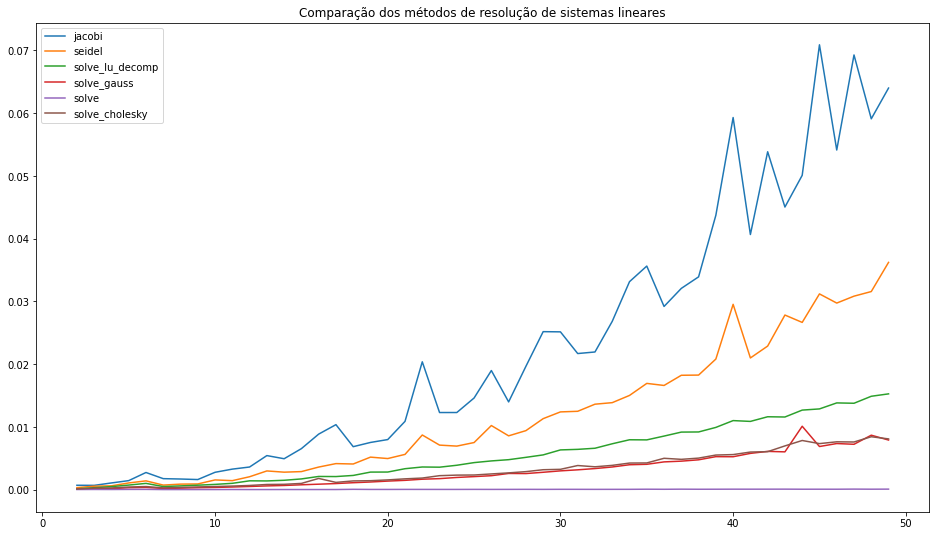

In [139]:
results_df.plot(use_index=True,figsize=(16,9), 
                title='Comparação dos métodos de resolução de sistemas lineares');

### Comparação dos métodos iterativos

No gráfico abaixo, são comparados os métodos iterativos de gauss-jacobi e gauss-seidel. Como explicado anteriormente o método de gauss-seidel converge mais rápido pois a cada iteração é atualizado o x calculado na iteração anterior, o impacto dessa mudança fica claro no gráfico abaixo. 


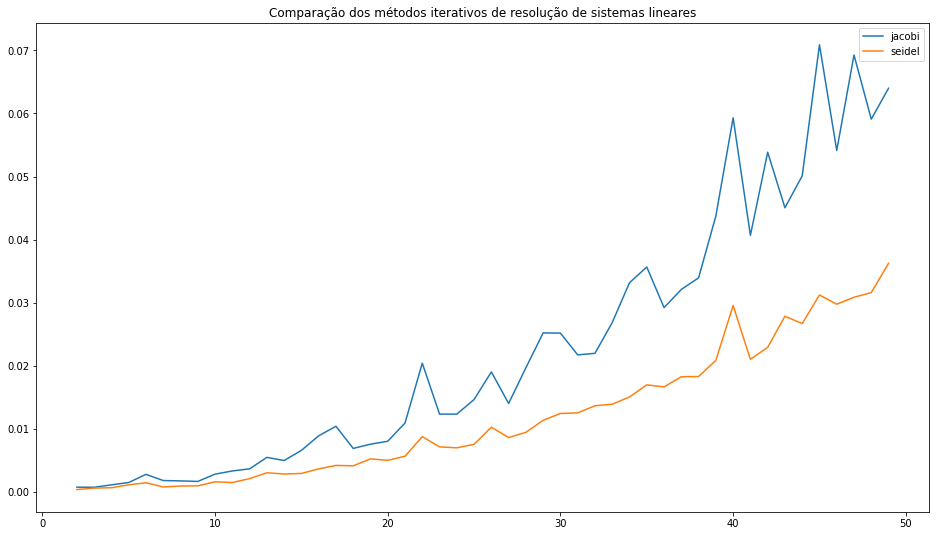

In [140]:
results_df[['jacobi', 'seidel']].plot(use_index=True,figsize=(16,9), 
                title='Comparação dos métodos iterativos de resolução de sistemas lineares');

### Comparação dos métodos diretos

No gráfico abaixo, são comparados os métodos diretos: decomposição da LU, decomposição de cholesky,o método de gauss e o próprio do python.

Os métodos tem uma complexidade bem parecida todos em torno de $n^3$ flops, eles tem pequenas diferenças por conta da lógica e da implementação também.

Vale ressaltar a diferença do método de cholesky e o LU, o LU tem uma complexidade de $\frac{2n^3}{3}$ e o Cholesky de $frac{n^3}{3}$, sendo então mais rápido que o LU como mostrado no gráfico.

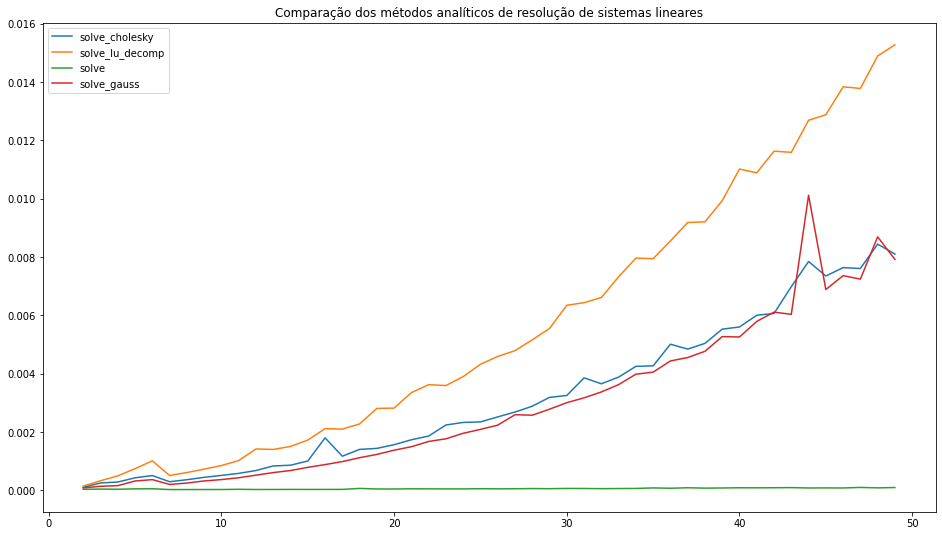

In [142]:
results_df[['solve_cholesky', 'solve_lu_decomp', 'solve','solve_gauss']].plot(use_index=True,figsize=(16,9), 
                title='Comparação dos métodos analíticos de resolução de sistemas lineares');